### **Singular Value Decomposition**

Singular Value Decomposition (SVD) is a mathematical technique used to decompose a matrix into three distinct components. It is widely used in data science, machine learning, and text analysis for tasks like dimensionality reduction, topic modeling, and noise reduction.

The Core Idea of SVD
Given a matrix 𝐴 of dimensions 𝑚 × 𝑛 SVD factorizes it into three matrices:  
**A = U⋅S⋅V_T**

where:
**U** = An 𝑚 × 𝑚 orthogonal matrix, representing the patterns of rows (e.g., terms in a term-document matrix).  
**S** = A diagonal 𝑚 × 𝑛 matrix with non-negative real numbers on the diagonal. These numbers represent the "strength" or importance of the corresponding components.  
**V_T** (V Transpose) = An 𝑛 × 𝑛 orthogonal matrix, representing the patterns of columns (e.g., documents in a term-document matrix).  

The singular values in 𝑆 are sorted in descending order, and the largest singular values capture the most significant patterns in the data.

### **Topic Modeling**
Topic modeling is an unsupervised machine learning technique used to uncover hidden semantic structures (topics) in a collection of documents. It is widely used in text analysis to summarize and organize large collections of unstructured text data.

### Popular Topic Modeling Techniques
1. Latent Semantic Analysis (LSA)  
Description: Uses Singular Value Decomposition (SVD) to reduce the dimensionality of the document-term matrix, capturing the most significant patterns.  
Limitation: Topics are less interpretable as LSA is not probabilistic.  

2. Non-Negative Matrix Factorization (NMF)  
Description: A matrix factorization technique where the document-term matrix is factorized into two smaller matrices representing topics and their word distributions.  
Advantage: Works well with TF-IDF and produces non-negative values, making topics more interpretable.

3. Latent Dirichlet Allocation (LDA)  
Description: A generative probabilistic model that assumes each document is a mixture of topics, and each topic is a mixture of words.  
Input: A document-term matrix where rows are documents, columns are words, and values are word frequencies or weights (e.g., TF-IDF).  
Output: Topic distributions for documents and word distributions for topics.  

4. Dynamic Topic Modeling (DTM)  
Description: Extends LDA to study how topics evolve over time.  
Application: Useful for time-sensitive datasets like news articles or social media posts.  


In [2]:
# import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

In [3]:
# read the data
data = pd.read_csv('boomlive_data_cleaned.csv', encoding='unicode_escape')
data.head(3)

,Category,Link,Heading,Sub_heading,Author,Date,Claim,Fact_check,Claim_summary,Claimed_by,Fact_check_summary,Links,Year,Month
0,fact check,https://www.boomlive.in/fact-check/awami-leagu...,bangladeshi actor being heckled on video false...,"according to local reports, mishti subas was c...",Archis Chowdhury,10/10/2024 14:16,video shows an american woman being heckled in...,boom identified the woman as bangladeshi actor...,video shows an american woman being heckled in...,social media users,FALSE,"['https://archive.is/607Xw', 'https://www.face...",2024,10
1,fast check,https://www.boomlive.in/fast-check/morphed-pho...,morphed photo falsely shared as patanjali sell...,boom found that the viral image was morphed fr...,Yangchula Bhutia,10/9/2024 13:33,an image showing a beef biryani spice mix with...,boom found that the viral image claiming patan...,a viral image claims that patanjali manufactur...,facebook,FALSE,NaN,2024,10
2,fact check,https://www.boomlive.in/fact-check/video-of-ma...,video of man killed by cousins in bangladesh f...,boom found that the deceased man's name is han...,Tausif Akbar,10/8/2024 18:36,video shows a hindu man killed by slitting his...,the incident happened because of personal enmi...,video shows body of a hindu man killed by slit...,"facebook users, x users",FALSE,[],2024,10


In [4]:
# extract 2024 data
data_2024 = data[data['Year'] == 2024]
data_2024.head(3)

,Category,Link,Heading,Sub_heading,Author,Date,Claim,Fact_check,Claim_summary,Claimed_by,Fact_check_summary,Links,Year,Month
0,fact check,https://www.boomlive.in/fact-check/awami-leagu...,bangladeshi actor being heckled on video false...,"according to local reports, mishti subas was c...",Archis Chowdhury,10/10/2024 14:16,video shows an american woman being heckled in...,boom identified the woman as bangladeshi actor...,video shows an american woman being heckled in...,social media users,FALSE,"['https://archive.is/607Xw', 'https://www.face...",2024,10
1,fast check,https://www.boomlive.in/fast-check/morphed-pho...,morphed photo falsely shared as patanjali sell...,boom found that the viral image was morphed fr...,Yangchula Bhutia,10/9/2024 13:33,an image showing a beef biryani spice mix with...,boom found that the viral image claiming patan...,a viral image claims that patanjali manufactur...,facebook,FALSE,NaN,2024,10
2,fact check,https://www.boomlive.in/fact-check/video-of-ma...,video of man killed by cousins in bangladesh f...,boom found that the deceased man's name is han...,Tausif Akbar,10/8/2024 18:36,video shows a hindu man killed by slitting his...,the incident happened because of personal enmi...,video shows body of a hindu man killed by slit...,"facebook users, x users",FALSE,[],2024,10


C:\Users\prita\AppData\Local\Temp\ipykernel_32\1167946507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data_2024, palette='coolwarm')


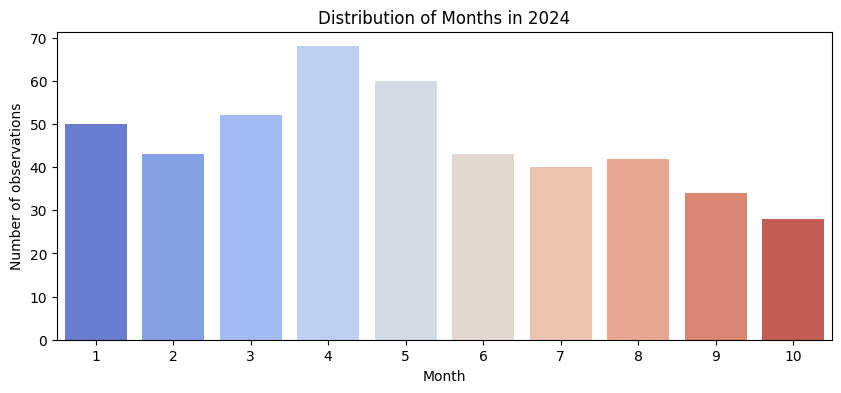

In [5]:
# histogram of the Month column using seaborn of year 2024
plt.figure(figsize=(10, 4))
sns.countplot(x='Month', data=data_2024, palette='coolwarm')
plt.title('Distribution of Months in 2024')
plt.xlabel('Month')
plt.ylabel('Number of observations')
plt.show()

#### SVD/LSA for Topic Modeling

**Step 1: Preprocess the Text Data**  
Tokenization: Break down the text into tokens.  

Lowercasing and Removal of Stopwords: Convert all words to lowercase and remove common stopwords.  

Stemming/Lemmatization: Reduce words to their base form.  

Term-Document Matrix (TDM): Create a matrix with documents as rows, terms as columns, and values representing the frequency (or weighted frequency) of each term in each document.  

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# preprocess the text data
# remove stopwords
stop_words = set(stopwords.words('english'))

# extract the claims
claims = data_2024['Claim']

# drop NaN values
claims = claims.dropna()


# Custom stopwords specific to misinformation data
custom_stopwords = {'claim', 'false', 'video', 'social', 'image', 'media', 'online', 'showing', 'shows', 'show', 'viral',
                    'share', 'shared'}
all_stopwords = stop_words.union(custom_stopwords)

# Sample data
claims = claims.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))

In [8]:
## lemmitization and stemming
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Lemmatization
lemmatizer = WordNetLemmatizer()
claims = claims.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
print(claims.head())

# tokenize the claims using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(claims)

print(X.shape)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0     american woman heckled bangladesh wearing hijab.
1    beef biryani spice mix patanjali branding circ...
2    hindu man killed slitting throat front everyon...
3    tv actress lebanon slap maulvi making abusive ...
4    palestineâs foreign minister addressing fals...
Name: Claim, dtype: object
(452, 3150)


**Step 2: Apply SVD on the Term-Document Matrix** 

Decomposition: Apply SVD to factorize the TDM:

𝑇𝐷𝑀 = 𝑈⋅𝑆⋅𝑉_𝑇
 
where:
U: Matrix representing terms.

S: Diagonal matrix with singular values.

V_T: Matrix representing documents.

Topic Extraction: The columns in 𝑈 and rows in 𝑉_𝑇 correspond to latent topics. By selecting the top 𝑘 singular values (based on the number of topics you want), you effectively reduce noise and focus on the core structure of the data.

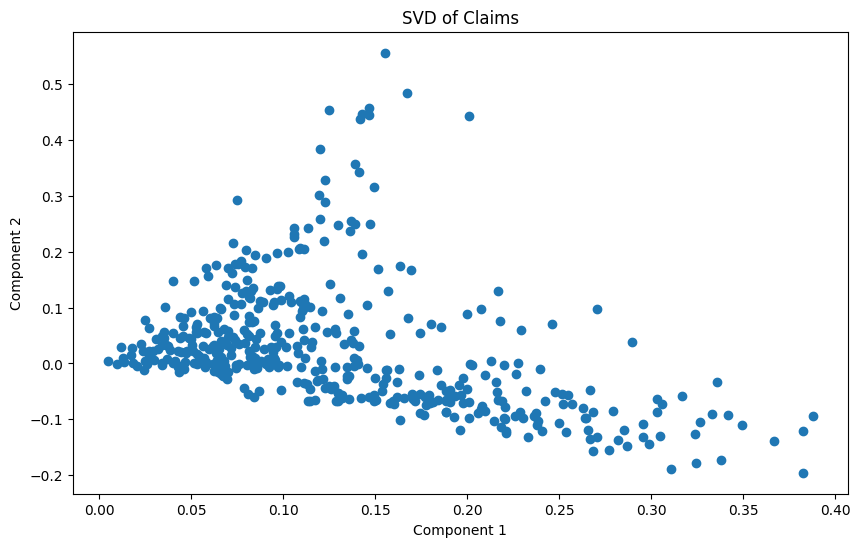

In [9]:
# Apply SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# plot the SVD
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD of Claims')
plt.show()




**Interpretation of the SVD Graph**
The graph visualizes the first two components resulting from Singular Value Decomposition (SVD) applied to the text data (claims). 

1. Components as Features
X-axis (Component 1): Represents the first principal component, which captures the largest variance (i.e., the most significant patterns) in the data. Points further along this axis have strong contributions from features aligned with Component 1.

Y-axis (Component 2): Represents the second principal component, which captures the second-largest variance orthogonal to Component 1. It provides additional distinguishing information that cannot be explained by Component 1.

Clusters: Areas of high-density points may indicate groups of similar claims (e.g., claims sharing common themes or narratives). These clusters suggest that the data naturally groups into distinct themes.

Outliers: Points that are far from the main clusters or widely spread out may represent unique or rare claims that are thematically distinct from the majority.

The broader spread along Component 1 suggests that this dimension captures most of the variation in the data. Claims spread along this axis are differentiated by dominant patterns or themes in the dataset.

This visualization confirms that the high-dimensional text data can be effectively represented in a reduced-dimensional space, capturing the essential patterns for further analysis like clustering or topic modeling.


In [10]:
# Display the top 10 words of extracted topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


display_topics(svd, vectorizer.get_feature_names_out(), 10)

Topic 0:
party minister old prime janata modi congress bharatiya sabha bjp
Topic 1:
woman hindu bangladesh muslim communal assaulted men man group wearing


**Topic 0:**
- This topic is heavily centered around political themes and key political entities in India.
- Words like "minister," "prime," "modi," and "janata" suggest a focus on political figures and the Bharatiya Janata Party (BJP).
- The mention of "congress" points to the Indian National Congress, indicating narratives involving opposition parties.
- Terms like "party" and "sabha" (likely referring to the Lok Sabha) suggest a focus on elections, parliamentary debates, or political campaigns.
- Misinformation may revolve around election campaigns, political achievements or scandals, and narratives targeting specific leaders or parties.

**Topic 1:**
- This topic reflects communal narratives involving Hindu and Muslim communities, particularly in the context of Bangladesh and India.
- The mention of "woman," "assaulted," and "wearing" suggests stories involving gender-based violence, potentially focusing on the treatment of women in communal conflicts.
- The inclusion of "Bangladesh" implies that this topic extends beyond India, potentially involving cross-border narratives or tensions.
- Theme: Fabricated or exaggerated stories about communal violence, assaults on women, or religious tensions, likely designed to provoke strong emotional reactions or incite polarization.

In [11]:
print("Components (Topics):\n", svd.components_)
print("Explained Variance Ratio:\n", svd.explained_variance_ratio_)

Components (Topics):
 [[ 1.16576329e-02  3.69265206e-03  3.49611328e-03 ...  4.05768665e-03
   9.02041191e-04  9.02041191e-04]
 [-4.19547739e-03  2.72385002e-03  5.49815030e-03 ... -1.46607901e-03
  -6.84667940e-05 -6.84667940e-05]]
Explained Variance Ratio:
 [0.00631696 0.0128885 ]


Each component captures a small fraction of the total variance in the dataset. This is typical in text data where variance is distributed across many dimensions due to the sparsity and high dimensionality of the text representation (e.g., TF-IDF).

In [12]:
# Apply svd with 2 - 10 components
# for each topic print the top 10 words
# save the explained variance ratio in a list

for i in range(2, 11):
    svd = TruncatedSVD(n_components=i, n_iter=100, random_state=42)
    X_svd = svd.fit_transform(X)
    print(f"Number of Components: {i}")
    display_topics(svd, vectorizer.get_feature_names_out(), 10)
    print("\n")
    print("Explained Variance Ratio:\n", svd.explained_variance_ratio_)
    print("\n")



Number of Components: 2
Topic 0:
party minister old prime janata modi congress bharatiya sabha bjp
Topic 1:
woman hindu bangladesh muslim communal assaulted men group man wearing


Explained Variance Ratio:
 [0.00631949 0.01289539]


Number of Components: 3
Topic 0:
party minister old prime janata modi congress bharatiya sabha bjp
Topic 1:
woman hindu bangladesh muslim communal assaulted men group man wearing
Topic 2:
party bharatiya janata bjp lok sabha elections election pradesh ongoing


Explained Variance Ratio:
 [0.00631949 0.01289539 0.01183603]


Number of Components: 4
Topic 0:
party minister old prime janata modi congress bharatiya sabha bjp
Topic 1:
woman hindu bangladesh muslim communal assaulted men group man wearing
Topic 2:
party bharatiya janata bjp lok sabha elections election pradesh ongoing
Topic 3:
gandhi rahul congress leader woman flag news photo fake andhra


Explained Variance Ratio:
 [0.00631949 0.01289539 0.01183603 0.00902998]


Number of Components: 5
Topic 0

- Across all numbers of components, certain themes emerge consistently, such as political narratives (e.g., BJP, Congress, elections), communal issues (e.g., Hindu-Muslim dynamics, Bangladesh), and gender-based incidents (e.g., assault, women-related topics).
- These recurring themes suggest the core patterns of misinformation in the dataset, which revolve around politically and socially sensitive issues.
- As the number of components increases, the topics become more specific and granular, uncovering niche narratives. 
For instance:
- With 6 components, a theme on Ayodhya’s Ram Temple (Topic 6) emerges.
- By 8 components, we see a topic specifically focusing on RG Kar Medical College (Topic 7).
- With 10 components, a unique theme around farmers' protests in Delhi appears (Topic 9).

- Each new component captures progressively less variance, as shown by the Explained Variance Ratios. The first few components capture the dominant themes, while later components represent more specific or minor patterns.

6 Components is the optimal choice:
- It balances generality and specificity, capturing a wide range of themes without excessive overlap or unnecessary fragmentation.
- The topics are distinct, yet comprehensive, covering political narratives, communal issues, gender-based misinformation, and specific regional or thematic incidents like Ayodhya and Andhra Pradesh.

**Interpretation of 6 Components:**
- Topic 0: Focuses on **political parties and leaders**, with a strong emphasis on BJP, Congress, and parliamentary elections.
- Topic 1: Highlights **communal and gender-based narratives**, particularly Hindu-Muslim dynamics and incidents involving women.
- Topic 2: Explores **election-related misinformation**, with terms like "Lok Sabha" and "elections," specifically involving BJP and regional states like Andhra Pradesh.
- Topic 3: Addresses narratives involving **Rahul Gandhi and Congress**, with terms like "flag," "photo," and "fake," suggesting visual misinformation tied to political imagery.
- Topic 4: A mix of **Bangladesh-focused narratives and broader political mentions**, including "Narendra Modi," "minister," and "party."
- Topic 5: Specific to **Andhra Pradesh and election victories**, highlighting fabricated claims such as "landslide victory" in assembly elections.


### **Categorize the data and evaluate befor, during and after the election**

**January - March** : Before election period  
**April - May** : Election period    
**June - September** : After election period  


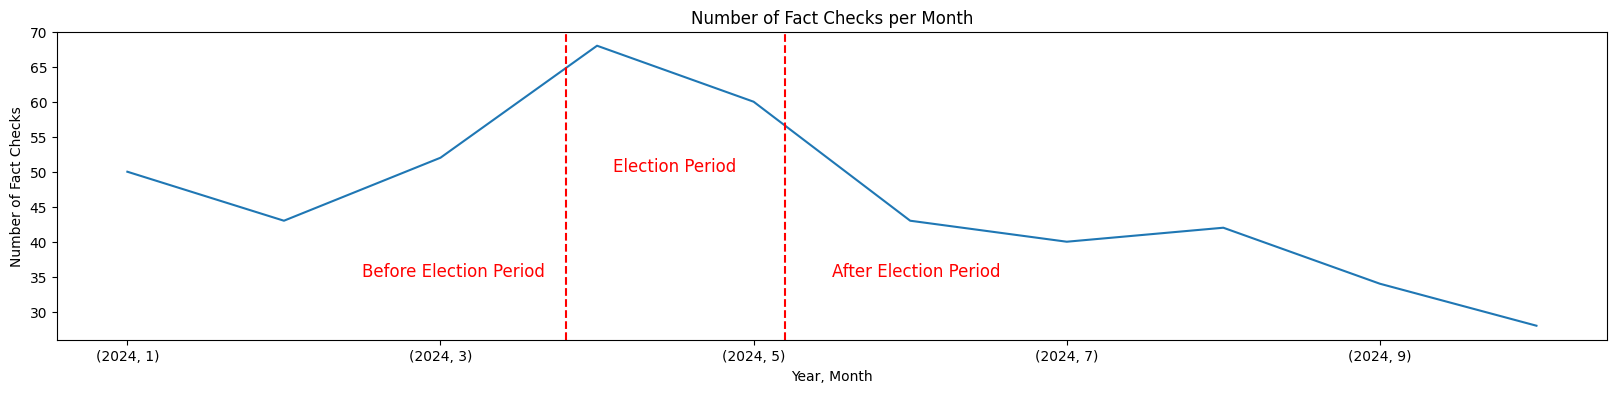

In [13]:
plt.figure(figsize=(20, 4))
data_2024.groupby(['Year', 'Month']).size().plot()
plt.title('Number of Fact Checks per Month')
plt.xlabel('Year, Month')
plt.ylabel('Number of Fact Checks')
plt.axvline(x=2.8, color='r', linestyle='--')
plt.axvline(x=4.2, color='r', linestyle='--')
# add label to the election period in the plot inbetween the two red lines
plt.text(1.5, 35, 'Before Election Period', fontsize=12, color='r')
plt.text(3.1, 50, 'Election Period', fontsize=12, color='r')
plt.text(4.5, 35, 'After Election Period', fontsize=12, color='r')
#plt.text(7.1, 50, "1. Bangladesh's political unrest", fontsize=12, color='r')
#plt.text(7.1, 46, "2. RG Kar Medical College case", fontsize=12, color='r')
plt.show()

In [14]:
# categorize the data into before, during and after election period
data_before = data_2024[data_2024['Month'] <= 3]
data_during = data_2024[(data_2024['Month'] > 3) & (data_2024['Month'] <= 5)]
data_after = data_2024[data_2024['Month'] > 5]

In [15]:
# print the shape of the data
print("Befor:", data_before.shape)
print("During:", data_during.shape)
print("After:", data_after.shape)

Befor: (145, 14)
During: (128, 14)
After: (187, 14)


In [16]:
# aggregate the claims for each period
claims_before = data_before['Claim']
claims_during = data_during['Claim']
claims_after = data_after['Claim']

# drop NaN values
claims_before = claims_before.dropna()
claims_during = claims_during.dropna()
claims_after = claims_after.dropna()

# print the shape of the data
print("Befor:", claims_before.shape)
print("During:", claims_during.shape)
print("After:", claims_after.shape)

Befor: (143,)
During: (124,)
After: (185,)


In [17]:
# preprocess the text data
# remove stopwords
claims_before = claims_before.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))
claims_during = claims_during.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))
claims_after = claims_after.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))

# Lemmatization
claims_before = claims_before.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
claims_during = claims_during.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
claims_after = claims_after.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# tokenize the claims using TfidfVectorizer
X_before = vectorizer.fit_transform(claims_before)
X_during = vectorizer.fit_transform(claims_during)
X_after = vectorizer.fit_transform(claims_after)

In [18]:
# Apply SVD/LSA on before election period
svd_before = TruncatedSVD(n_components=2)
X_svd_before = svd_before.fit_transform(X_before)

# print the explained variance ratio
print("Explained Variance Ratio Before Election Period:\n", svd_before.explained_variance_ratio_,"\n")
print("Components (Topics) Before Election Period:\n", svd_before.components_,"\n")
display_topics(svd_before, vectorizer.get_feature_names_out(), 10)

Explained Variance Ratio Before Election Period:
 [0.00469658 0.0213708 ] 

Components (Topics) Before Election Period:
 [[ 2.34284947e-02  3.45049693e-03  2.54037716e-03 ...  6.97338084e-03
   8.21293024e-03  7.88814376e-03]
 [-4.14013151e-02  2.74352117e-04  3.54992181e-05 ... -1.81202632e-06
   9.17432013e-04  3.05570853e-03]] 

Topic 0:
list it near local mp individuals commuting disqualified discarded free
Topic 1:
local mp disqualified commuting dismissing returned meiteis individuals power member


**Topic 0:**
- This topic appears to focus on political narratives related to members of parliament (MPs) and their status or activities during a specific period. Terms like "disqualified" and "discarded" may suggest misinformation around political dismissals or eligibility, potentially tied to local election campaigns.

**Topic 1:**
- This topic also revolves around political narratives, but with a focus on local representation (e.g., MPs) and community groups such as "Meiteis (Manipur violence)." The inclusion of "power" and "election period" indicates potential themes related to governance, representation, or election campaigns.

In [19]:
# Apply SVD/LSA on during election period
svd_during = TruncatedSVD(n_components=2)
X_svd_during = svd_during.fit_transform(X_during)

# print the explained variance ratio
print("Explained Variance Ratio During Election Period:\n", svd_during.explained_variance_ratio_,"\n")
print("Components (Topics) During Election Period:\n", svd_during.components_,"\n")
display_topics(svd_during, vectorizer.get_feature_names_out(), 10)


Explained Variance Ratio During Election Period:
 [0.01178165 0.02546102] 

Components (Topics) During Election Period:
 [[ 0.00607505  0.01040785  0.01043474 ...  0.00608672  0.00690939
   0.00690939]
 [ 0.00310015  0.01910341 -0.00184891 ...  0.0086567  -0.00100737
  -0.00100737]] 

Topic 0:
joking final australia monk graf awami islamic human hoarding contest
Topic 1:
human hoarding let indicate israel called agent lucknow leave demise


**Topic 0:**
- Cultural or Religious References: Terms like "monk," "islamic," and "awami" suggest themes related to Islamic or Bangladeshi political/religious contexts (e.g., Awami League).

**Topic 1:**
- This topic centers on geopolitical and regional narratives, with a focus on: Israel and Regional Politics: Words like "israel" and "agent" suggest content involving international relations or geopolitical themes.Terms like "lucknow" and "demise" hint at regional misinformation, potentially tied to Uttar Pradesh or Lucknow politics.

In [20]:
# Apply SVD/LSA on after election period
svd_after = TruncatedSVD(n_components=2)
X_svd_after = svd_after.fit_transform(X_after)

# print the explained variance ratio
print("Explained Variance Ratio After Election Period:\n", svd_after.explained_variance_ratio_,"\n")
print("Components (Topics) After Election Period:\n", svd_after.components_,"\n")
display_topics(svd_after, vectorizer.get_feature_names_out(), 10)


Explained Variance Ratio After Election Period:
 [0.01091998 0.01712545] 

Components (Topics) After Election Period:
 [[0.00602811 0.00794666 0.00745707 ... 0.00278007 0.00139003 0.00139003]
 [0.019086   0.01068804 0.00186459 ... 0.00642489 0.00321244 0.00321244]] 

Topic 0:
woman hindu bangladesh muslim assaulted communal man group wearing men
Topic 1:
gandhi minister prime rahul leader former congress party modi singh


**Topic 0:**
- This topic reflects communal and gender-based narratives, focusing on:
- Hindu-Muslim Relations: The inclusion of "hindu," "muslim," and "bangladesh" suggests themes centered on communal tensions, possibly involving cross-border narratives.
- Gender-Based Incidents: Words like "woman," "assaulted," "wearing," and "men" point to incidents involving women, which are often sensationalized to provoke emotional reactions.
- Theme: Stories or visuals depicting **communal violence** or tensions between Hindu and Muslim communities, both in India and Bangladesh.

**Topic 1:**
- This topic focuses on political narratives, specifically:
- Prominent Political Figures: The presence of "gandhi," "rahul," "modi," and "singh" suggests that misinformation involving political leaders remains prevalent even after the election.
- Party Politics: Terms like "congress" and "party" indicate narratives targeting political parties, particularly the Congress Party and BJP.
- Post-election narratives involving Rahul Gandhi, Narendra Modi, and other political leaders, possibly questioning their actions, statements, or legitimacy.

### Creating 3 documents by combining claims in each period

In [21]:
# create  dictionary claims for each period
dict_claims = {'Before Election Period': claims_before, 'During Election Period': claims_during,
               'After Election Period': claims_after}

# aggregate the claims for each period
aggregate_documnets = [" ".join(dict_claims[period]) for period in dict_claims]

In [22]:
# tokenize the claims using TfidfVectorizer
X_aggregate = vectorizer.fit_transform(aggregate_documnets)

In [23]:
# Apply SVD/LSA on aggregate data
svd_aggregate = TruncatedSVD(n_components=3)
X_svd_aggregate = svd_aggregate.fit_transform(X_aggregate)

# print the explained variance ratio
print("Explained Variance Ratio Aggregate Data:\n", svd_aggregate.explained_variance_ratio_,"\n")
print("Components (Topics) Aggregate Data:\n", svd_aggregate.components_,"\n")
display_topics(svd_aggregate, vectorizer.get_feature_names_out(), 10)


Explained Variance Ratio Aggregate Data:
 [9.04874453e-07 5.01775750e-01 4.98223346e-01] 

Components (Topics) Aggregate Data:
 [[ 0.01278734  0.00765326  0.00911286 ...  0.00911286  0.00382663
   0.00382663]
 [-0.02490559 -0.00681158 -0.01261885 ... -0.01261885 -0.00340579
  -0.00340579]
 [-0.01403207  0.02397654  0.01051829 ...  0.01051829  0.01198827
   0.01198827]] 

Topic 0:
minister party old muslim congress hindu prime india indian modi
Topic 1:
party lok janata sabha bharatiya bjp modi congress narendra elections
Topic 2:
muslim woman hindu bangladesh claim college medical communal rg kar


### **Non-Negative matrix Factorization**

Non-negative Matrix Factorizzation (NMF) is a non-probabilistic technique, particularly suitable for large, sparse datasets. Unlike probabilistic models like LDA and HDP, NMF is a linear algebra-based method that decomposes the document-term matrix into two lower-dimensional matrices, one representing the topics and the other representing the topic distribution for each document.

NMF involves the following steps:

1. Matrix Decomposition: NMF decomposes the document-term matrix into two non-negative matrices.
2. Iterative Optimization: Using iterative optimization techniques, NMF refines these matrices to minimize the reconstruction error.
3. Topic Extraction: The resulting matrices are used to extract the topics and their distribution across documents.

In [24]:
# Coherence
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import tokenize

# Word Clouds
from wordcloud import WordCloud

In [25]:
class AllWordClouds():

    def lda_wordcloud(self, topic, lda_model):
        wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        texts = [x[0] for x in lda_model.show_topic(topic)]
        long_string = ','.join(texts)
        wordcloud.generate(long_string)

        return wordcloud.to_image()

In [26]:
claims.shape

(452,)

In [27]:
claims.head()

0     american woman heckled bangladesh wearing hijab.
1    beef biryani spice mix patanjali branding circ...
2    hindu man killed slitting throat front everyon...
3    tv actress lebanon slap maulvi making abusive ...
4    palestineâs foreign minister addressing fals...
Name: Claim, dtype: object

In [28]:
# Create a dictionary
dictionary = corpora.Dictionary([list(tokenize(claim)) for claim in claims])

# Create a corpus
corpus_bow = [dictionary.doc2bow(list(tokenize(claim))) for claim in claims]

In [29]:
from gensim.models import Nmf

In [30]:
num_topics = 5

nmf_model = Nmf(
    corpus=corpus_bow,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42
)

In [31]:

for idx, topic in nmf_model.print_topics():
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.020*"minister" + 0.016*"modi" + 0.013*"prime" + 0.013*"old" + 0.010*"narendra" + 0.010*"former" + 0.010*"india" + 0.009*"leader" + 0.009*"claim" + 0.009*"people"

Topic: 1 
Words: 0.012*"circulating" + 0.011*"leader" + 0.009*"india" + 0.009*"â" + 0.008*"found" + 0.008*"old" + 0.007*"gandhi" + 0.007*"boom" + 0.006*"muslim" + 0.005*"united"

Topic: 2 
Words: 0.024*"news" + 0.018*"party" + 0.015*"i" + 0.015*"india" + 0.012*"abp" + 0.011*"sabha" + 0.010*"lok" + 0.010*"alliance" + 0.010*"election" + 0.010*"nda"

Topic: 3 
Words: 0.020*"claiming" + 0.012*"pradesh" + 0.012*"falsely" + 0.012*"hindu" + 0.010*"party" + 0.009*"communal" + 0.009*"photo" + 0.008*"muslim" + 0.007*"minister" + 0.007*"kejriwal"

Topic: 4 
Words: 0.022*"s" + 0.016*"minister" + 0.014*"prime" + 0.012*"former" + 0.012*"old" + 0.011*"woman" + 0.010*"muslim" + 0.010*"indian" + 0.010*"hindu" + 0.008*"party"



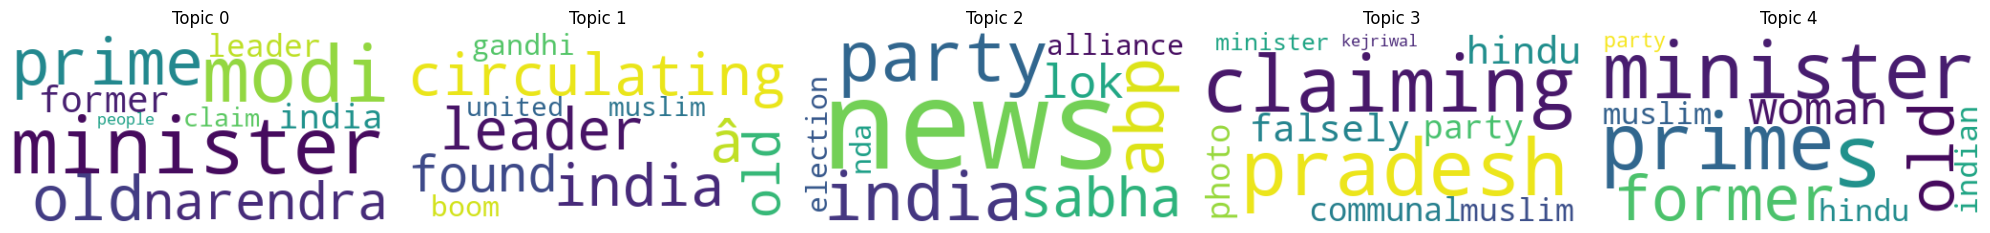

In [32]:

N = 5
wc_nmf = AllWordClouds()

fig, axes = plt.subplots(1, N, figsize=(20, 4))

for i in range(N):
    wc = wc_nmf.lda_wordcloud(i, nmf_model)
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()

In [33]:
# Coherence
# Compute Coherence Score
coherence_model_nmf = CoherenceModel(model=nmf_model, texts=[list(tokenize(claim)) for claim in claims], dictionary=dictionary, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('\nCoherence Score: ', coherence_nmf)



Coherence Score:  0.3727942049856209


**Topic 0:**
- This topic is focused on political leadership narratives, particularly surrounding Prime Minister Narendra Modi. The inclusion of terms like "former" and "old" suggests claims about past incidents, leadership roles, or older narratives being revisited for misinformation purposes.

**Topic 1:**
- This topic highlights circulating claims involving leaders such as Rahul Gandhi and other prominent political figures. The inclusion of "muslim" and "united" suggests a mix of communal narratives and possibly geopolitical stories.

**Topic 2:**
- This topic focuses on election-related narratives, with a specific emphasis on alliances, news coverage, and parliamentary elections (Lok Sabha).

**Topic 3:**
- This topic combines regional politics (e.g., Pradesh) with communal narratives. The use of "falsely" and "photo" suggests the prevalence of visual misinformation related to regional or communal incidents.

**Topic 4:**
- This topic bridges political and communal narratives, with terms like "prime minister," "hindu," "muslim," and "woman" pointing to stories targeting sensitive social and political issues.

The coherence score : 0.372
- The coherence score is relatively low, indicating that while the topics are somewhat distinct, there is overlap or ambiguity between them.
- For example, topics involving political narratives and communal narratives might share common terms, leading to less clear differentiation between the topics.


### NMF on befor, during and after election to get broader themes during those periods

Topic: 0 
Words: 0.014*"s" + 0.013*"claiming" + 0.010*"party" + 0.009*"ongoing" + 0.009*"protest" + 0.009*"recent" + 0.008*"minister" + 0.008*"chief" + 0.007*"falsely" + 0.007*"cancer"

Topic: 1 
Words: 0.014*"caption" + 0.013*"old" + 0.011*"money" + 0.009*"temple" + 0.009*"man" + 0.008*"people" + 0.008*"resurfaced" + 0.007*"house" + 0.007*"counting" + 0.006*"party"

Topic: 2 
Words: 0.030*"india" + 0.016*"minister" + 0.015*"modi" + 0.013*"prime" + 0.011*"boom" + 0.011*"new" + 0.010*"s" + 0.010*"claiming" + 0.010*"congress" + 0.010*"narendra"



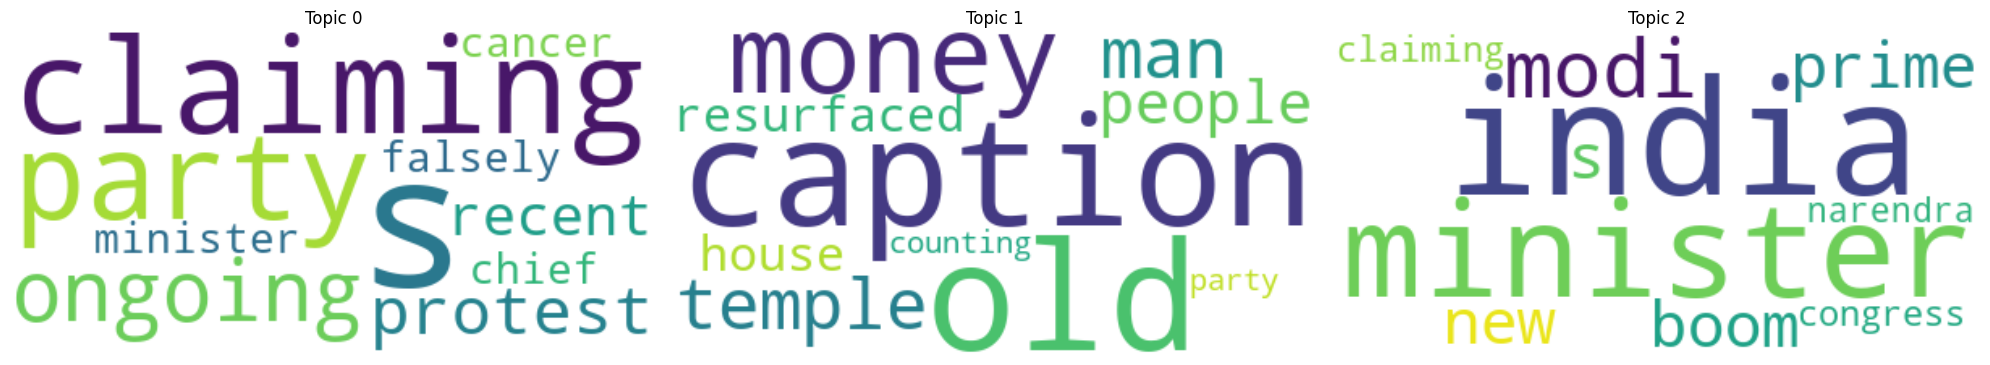

In [34]:
# Execute the NMF on before election period
# Create a dictionary
dictionary_before = corpora.Dictionary([list(tokenize(claim)) for claim in claims_before])

# Create a corpus
corpus_bow_before = [dictionary_before.doc2bow(list(tokenize(claim))) for claim in claims_before]

num_topics = 3

nmf_model_before = Nmf(
    corpus=corpus_bow_before,
    id2word=dictionary_before,
    num_topics=num_topics,
    random_state=42
)

for idx, topic in nmf_model_before.print_topics():
    print(f"Topic: {idx} \nWords: {topic}\n")

N = 3
wc_nmf_before = AllWordClouds()

fig, axes = plt.subplots(1, N, figsize=(20, 4))

for i in range(N):
    wc = wc_nmf_before.lda_wordcloud(i, nmf_model_before)
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()


In [35]:
# compute the coherence score
coherence_model_nmf_before = CoherenceModel(model=nmf_model_before, texts=[list(tokenize(claim)) for claim in claims_before], dictionary=dictionary_before, coherence='c_v')
coherence_nmf_before = coherence_model_nmf_before.get_coherence()
print('\nCoherence Score Before Election Period: ', coherence_nmf_before)


Coherence Score Before Election Period:  0.37834709866456034


Topic: 0 
Words: 0.017*"party" + 0.016*"janata" + 0.016*"s" + 0.016*"bharatiya" + 0.015*"modi" + 0.014*"sabha" + 0.013*"lok" + 0.012*"bjp" + 0.011*"falsely" + 0.011*"congress"

Topic: 1 
Words: 0.022*"party" + 0.020*"minister" + 0.019*"congress" + 0.017*"leader" + 0.015*"prime" + 0.015*"election" + 0.014*"modi" + 0.013*"sabha" + 0.013*"lok" + 0.013*"gandhi"

Topic: 2 
Words: 0.016*"minister" + 0.013*"s" + 0.013*"party" + 0.012*"old" + 0.011*"news" + 0.011*"chief" + 0.009*"former" + 0.009*"people" + 0.009*"student" + 0.009*"bus"



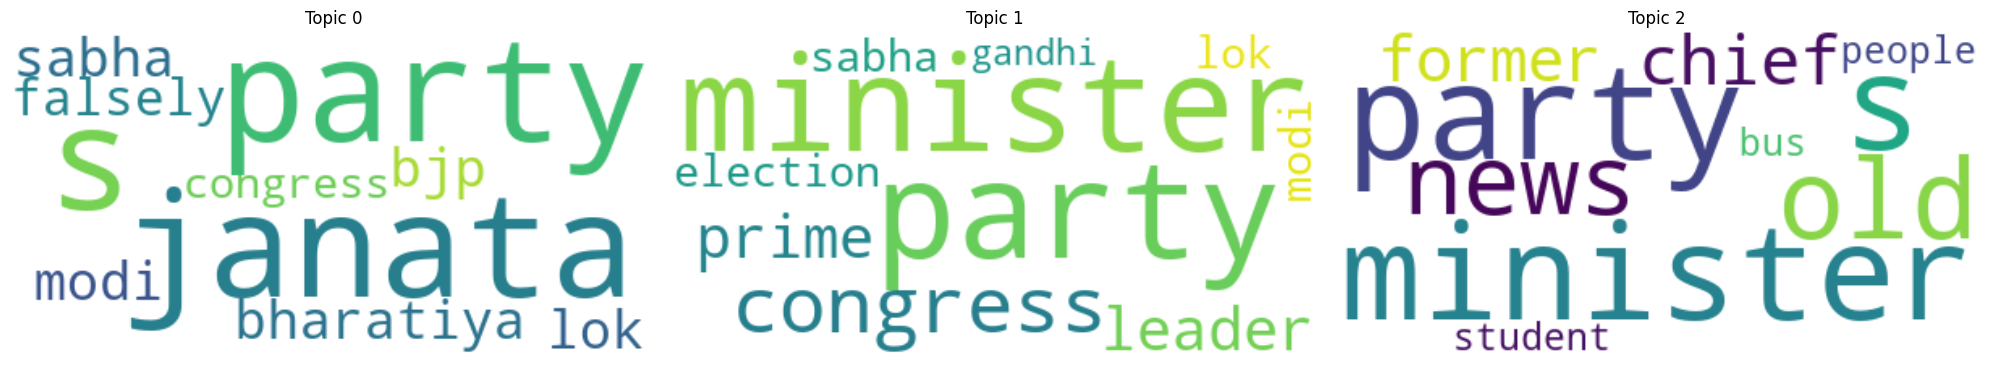

In [36]:
# Execute the NMF on during election period
# Create a dictionary
dictionary_during = corpora.Dictionary([list(tokenize(claim)) for claim in claims_during])

# Create a corpus
corpus_bow_during = [dictionary_during.doc2bow(list(tokenize(claim))) for claim in claims_during]

num_topics = 3

nmf_model_during = Nmf(
    corpus=corpus_bow_during,
    id2word=dictionary_during,
    num_topics=num_topics,
    random_state=42
)

for idx, topic in nmf_model_during.print_topics():
    print(f"Topic: {idx} \nWords: {topic}\n")

N = 3
wc_nmf_during = AllWordClouds()

fig, axes = plt.subplots(1, N, figsize=(20, 4))

for i in range(N):
    wc = wc_nmf_during.lda_wordcloud(i, nmf_model_during)
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()

In [37]:
# compute the coherence score
coherence_model_nmf_during = CoherenceModel(model=nmf_model_during, texts=[list(tokenize(claim)) for claim in claims_during], dictionary=dictionary_during, coherence='c_v')
coherence_nmf_during = coherence_model_nmf_during.get_coherence()
print('\nCoherence Score During Election Period: ', coherence_nmf_during)


Coherence Score During Election Period:  0.33831663090022807


Topic: 0 
Words: 0.022*"muslim" + 0.017*"party" + 0.017*"hindu" + 0.016*"minister" + 0.012*"bangladesh" + 0.012*"prime" + 0.011*"former" + 0.009*"indian" + 0.008*"janata" + 0.008*"leader"

Topic: 1 
Words: 0.020*"news" + 0.016*"s" + 0.014*"i" + 0.013*"â" + 0.012*"abp" + 0.012*"claim" + 0.010*"poll" + 0.010*"chaudhary" + 0.010*"nda" + 0.009*"alliance"

Topic: 2 
Words: 0.017*"woman" + 0.011*"hindu" + 0.010*"i" + 0.009*"lok" + 0.009*"sabha" + 0.008*"post" + 0.008*"group" + 0.007*"recently" + 0.007*"news" + 0.006*"election"



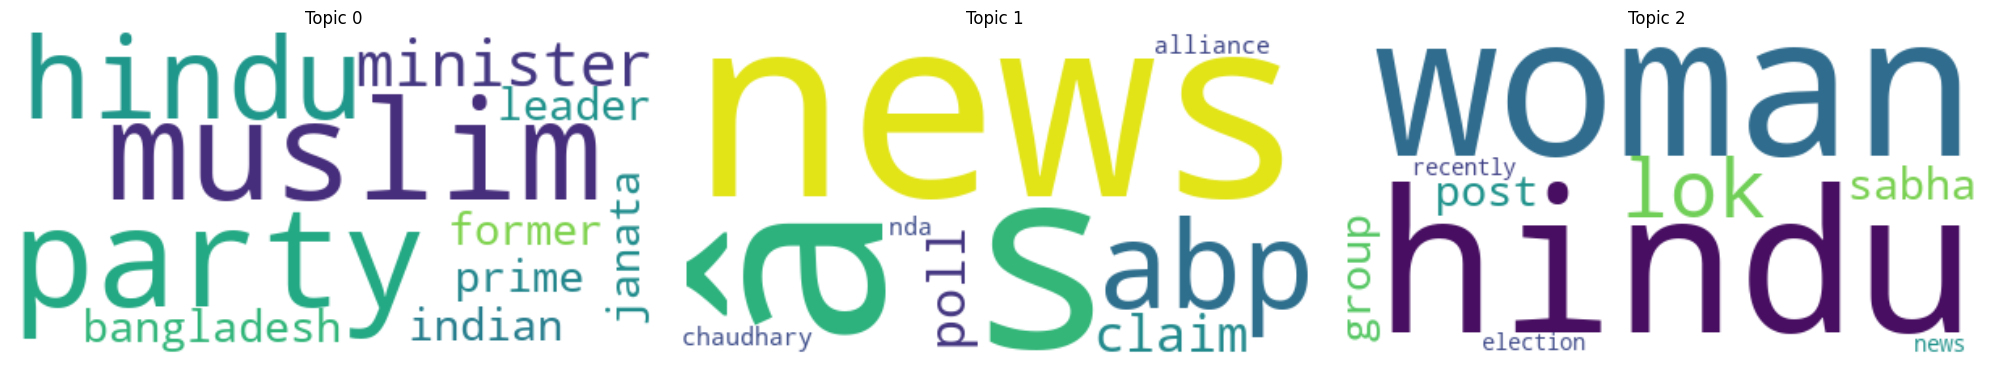

In [38]:
# Execute the NMF on after election period
# Create a dictionary
dictionary_after = corpora.Dictionary([list(tokenize(claim)) for claim in claims_after])

# Create a corpus
corpus_bow_after = [dictionary_after.doc2bow(list(tokenize(claim))) for claim in claims_after]

num_topics = 3

nmf_model_after = Nmf(
    corpus=corpus_bow_after,
    id2word=dictionary_after,
    num_topics=num_topics,
    random_state=42
)

for idx, topic in nmf_model_after.print_topics():
    print(f"Topic: {idx} \nWords: {topic}\n")

N = 3
wc_nmf_after = AllWordClouds()

fig, axes = plt.subplots(1, N, figsize=(20, 4))

for i in range(N):
    wc = wc_nmf_after.lda_wordcloud(i, nmf_model_after)
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()

In [39]:
# compute the coherence score
coherence_model_nmf_after = CoherenceModel(model=nmf_model_after, texts=[list(tokenize(claim)) for claim in claims_after], dictionary=dictionary_after, coherence='c_v')
coherence_nmf_after = coherence_model_nmf_after.get_coherence()
print('\nCoherence Score After Election Period: ', coherence_nmf_after)



Coherence Score After Election Period:  0.34881076531687166


**Interpretation of coherence score:**

The coherence scores measure the quality of the topics generated by the NMF model for different periods relative to the election: before, during, and after. Higher coherence scores indicate that the topics are more coherent, distinct, and meaningful, while lower scores suggest overlapping or ambiguous topics.

- Topics before the election are the most coherent and distinct compared to the other periods. This could indicate that misinformation narratives were more focused and consistent in the pre-election period.
- During the election, coherence drops significantly, suggesting that misinformation became more diverse and fragmented. The wide variety of misinformation during the election period likely led to overlapping topics, reducing coherence.
- After the election, coherence improves slightly compared to the election period but remains lower than the pre-election period. The improvement in coherence reflects the consolidation of post-election narratives, although there’s still some diversity in themes.

These coherence scores reveal how misinformation evolves over time, with targeted focus before elections, chaos during elections, and consolidation after elections.